#### Introduction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import random

### Generate A Sample Dataset

Assume:
- that we created a classifier that determines whether an email is a spam or not
- that classifier gives a score that ranges from zero to one depending on its confidence that an email is a spam. 
- it will give a score closer to one if it "thinks" that an email is a spam, and a score closer to zero if it considers that an email is not a spam.

In [4]:
actual_values = ['not_spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 
                     'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 'spam', 'spam', 'not_spam', 
                     'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 
                     'not_spam', 'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam', 'spam', 'not_spam', 'not_spam', 
                     'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 'spam', 'not_spam', 'not_spam', 'not_spam',
                     'spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 
                     'not_spam', 'spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'not_spam', 'spam', 
                     'not_spam', 'spam', 'spam', 'spam', 'not_spam', 'not_spam']

In [5]:
set(actual_values)

{'not_spam', 'spam'}

In [6]:
calculated_values = [random.randrange(40,100,1) if x=='spam' else random.randrange(0,65,1) for x in actual_values]
calculated_values = [x/100 for x in calculated_values]

In [7]:
threshold = 0.5
predicted = ['spam' if x>threshold else 'not_spam' for x in calculated_values]

In [8]:
test_df = pd.DataFrame({'email_number': list(range(100)),
                        'actual': actual_values,
                        'classifier_score': calculated_values,
                        'predicted': predicted})

In [9]:
test_df.head()

,email_number,actual,classifier_score,predicted
0,0,not_spam,0.19,not_spam
1,1,not_spam,0.64,spam
2,2,spam,0.93,spam
3,3,not_spam,0.50,not_spam
4,4,spam,0.67,spam


In [10]:
test_df['actual'].value_counts()

not_spam    63
spam        37
Name: actual, dtype: int64

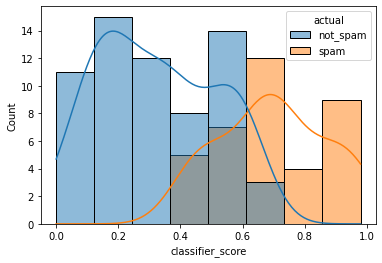

In [11]:
ax = sns.histplot(data=test_df, x="classifier_score", hue='actual', kde=True)

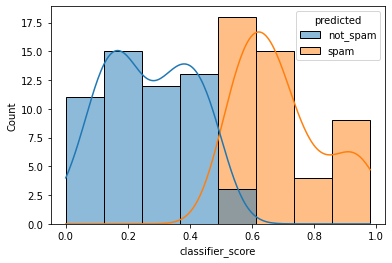

In [12]:
ax = sns.histplot(data=test_df, x="classifier_score", hue='predicted', kde=True)

### Testing the Accuracy

- To test the accuracy, we can compare the `actual` with the `predicted` column.
- Remember that `True` has a value of `1` in Python. Thus using `mean` to get the accuracy is valid. 

In [13]:
accuracy = (test_df['actual'] == test_df['predicted']).mean() * 100
accuracy

77.0

- Our model is 90% accurate
- But that is an incomplete picture of the performance of our classifier
- That is where the confusingly named `confusion matrix` comes in
- Let us discuss each part

### Confusion Matrix

#### True Positive

- spams labelled acurately as spams

In [24]:
tp_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='spam')
tp_classifier.sum()

30

In [25]:
tpr = tp_classifier.sum() / (test_df['actual']=='spam').sum()
tpr

0.8108108108108109

#### True Negative

- not spams labelled as such

In [26]:
tn_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='not_spam')
tn_classifier.sum()

47

In [27]:
tnr = tn_classifier.sum() / (test_df['actual']=='not_spam').sum()
tnr

0.746031746031746

#### False Positive

- Not spams labelled as spams

In [28]:
fp_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='spam')
fp_classifier.sum()

16

In [29]:
fpr = fp_classifier.sum() / (test_df['actual']=='spam').sum()
fpr

0.43243243243243246

#### False Negative

- Spams labelled as not spams

In [22]:
fn_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='not_spam')
fn_classifier.sum()

7

In [23]:
fnr = fn_classifier.sum() / (test_df['predicted']=='not_spam').sum()
fnr

0.12962962962962962